In [21]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_color_codes("pastel")
sns.set_context("talk", font_scale=1.1)  #Everything is larger

In [22]:
obj_df = pd.read_csv('c:/users/hp/Downloads/Results - Summary.csv')
obj_df.head()

arch_df = obj_df.loc[obj_df['Architecture'] == 'Ad Hoc Full']
arch_df.head()

,Fusion,Architecture,CT Pre-Process,Avg Accuracy,Min Accuracy,Max Accuracy,Desvpad Accuracy,Median Accuracy,Avg Precision,Min Precision,...,Min F-Score,Max F-Score,Desvpad F-Score,Median F-Score,Avg Kappa Value,Min Kappa Value,Max Kappa Value,Desvpad Kappa Value,Median Kappa Value,Wins Count
0,Unimodal,Ad Hoc Full,No,0.554035,0.465898,0.607829,0.037184,0.552354,0.562404,0.465897,...,0.461673,0.592915,0.038925,0.552354,0.108069,-0.068204,0.215658,0.074369,0.104707,NaN
5,Unimodal,Ad Hoc Full,Yes,0.536167,0.473343,0.597743,0.038977,0.546230,0.536268,0.442015,...,0.382326,0.595544,0.055982,0.546230,0.072334,-0.053314,0.195485,0.077954,0.092459,NaN
10,Intermediary Fusion,Ad Hoc Full,No,0.621662,0.531940,0.762248,0.056116,0.624039,0.646062,0.531952,...,0.531899,0.759073,0.055718,0.608711,0.243324,0.063881,0.524496,0.112233,0.248079,NaN
15,Intermediary Fusion,Ad Hoc Full,Yes,0.591751,0.469020,0.675072,0.053609,0.603146,0.607806,0.468810,...,0.468123,0.672930,0.052366,0.580336,0.183501,-0.061960,0.350144,0.107217,0.206292,NaN
20,Late Fusion,Ad Hoc Full,No,0.722310,0.460134,0.869837,0.124742,0.751921,0.763725,0.458510,...,0.454797,0.867593,0.125549,0.735492,0.444621,-0.079731,0.739673,0.249483,0.503842,NaN


In [39]:
grouped_arch = arch_df.groupby('Fusion').mean().reset_index()
avg_grouped_arch = grouped_arch[['Fusion','Avg Accuracy', 'Avg Precision', 'Avg Recall', 'Avg F-Score']].sort_values('Avg Accuracy', ascending=True)
avg_grouped_arch.rename(columns={'Avg Accuracy':'Acurácia', 'Avg Precision':'Precisão', 'Avg Recall':'Revocação', 'Avg F-Score':'F-Score'}, inplace=True)
avg_grouped_arch.head()

,Fusion,Acurácia,Precisão,Revocação,F-Score
2,Unimodal,0.545101,0.549336,0.545101,0.529956
0,Intermediary Fusion,0.606706,0.626934,0.606706,0.595064
1,Late Fusion,0.697815,0.736029,0.697815,0.683454


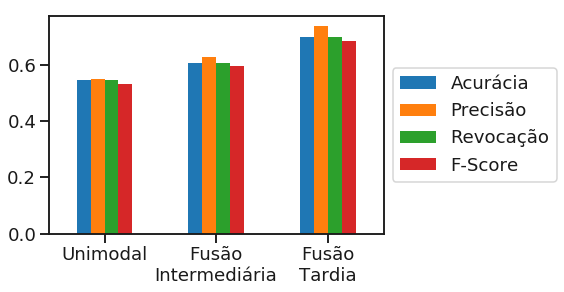

In [43]:
ax = avg_grouped_arch.plot.bar(x='Fusion', y=['Acurácia', 'Precisão', 'Revocação', 'F-Score'], rot=0)
ax.set_xlabel('')
plt.xticks(range(3), ['Unimodal', 'Fusão\nIntermediária', 'Fusão\nTardia'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('c:/temp/chart_multi_inputs.eps', format='eps', bbox_inches='tight')

In [59]:
pp_df = pd.read_csv('c:/users/hp/Downloads/Results - Summary.csv')

focus_pp = pp_df[['Fusion','CT Pre-Process','Avg Accuracy', 'Avg Precision', 'Avg Recall', 'Avg F-Score']]
focus_pp.head()

,Fusion,CT Pre-Process,Avg Accuracy,Avg Precision,Avg Recall,Avg F-Score
0,Unimodal,No,0.554035,0.562404,0.554035,0.539852
1,Unimodal,No,0.539361,0.561272,0.539361,0.489642
2,Unimodal,No,0.507973,0.506002,0.507973,0.472358
3,Unimodal,No,0.603362,0.604658,0.603362,0.601889
4,Unimodal,No,0.613929,0.670470,0.613929,0.579047


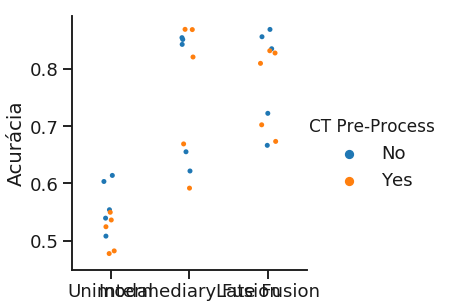

In [68]:
g = sns.catplot(data=focus_pp, x='Fusion', y='Avg Accuracy', hue='CT Pre-Process')
axes = g.axes.flatten()
axes[0].set_ylabel("Acurácia")
for ax in axes:
    ax.set_xlabel('')

plt.savefig('c:/temp/chart_pp_accuracy.eps', format='eps', bbox_inches='tight')